## 5. Estructuras de control de flujo

En general, las estructurasa de control de flujo permiten modificar el flujo de ejecución de un programa.

Este flujo lo podemos modificar de las siguientes formas

- De acuerdo con una condición, ejecutar un bloque u otro de código
- Ejecutar un bloque mientras se cumpla una condición
- Ejecutar un bloque un número determinado de veces

### Instrucción `if`

La instrucción para **ejecutar bloques de forma condicional**. 

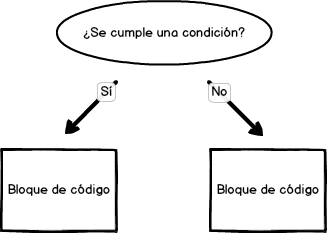

Puede estar compuesta a su vez de cero o más partes de `elif`, que son las diferentes alternativas. 

En Python no hay instrucción `switch` como en otros lenguajes, y la sucesión de diferentes `elif` partes lo sustituyen.

In [2]:
x = int(input("Introduce un entero: "))
if x < 0:
    x = 0
    print('Negativo cambiado a cero')
elif x == 0:
    print('Cero')
elif x == 1:
    print('Simple')
else:
    print('Más')

Introduce un entero: 1.3


ValueError: invalid literal for int() with base 10: '1.3'

####  Evita la repetición de variables en una instrucción `if`

**Dañino**

```python
is_generic_name = False
name = 'Tom”
if name == 'Tom' or name == 'Dick' or name == 'Harry':
    is_generic_name = True
```

**Idiomático**

```python
name = 'Tom'
is_generic_name = name in ('Tom', 'Dick', 'Harry')
```

#### Usa un `dict` para sustituir una instrucción `switch...case`

**Dañino**

```python
def apply_operation(left_operand, right_operand, operator):
    if operator == '+':
        return left_operand + right_operand
    elif operator == '-':
        return left_operand - right_operand
    elif operator == '*':
        return left_operand * right_operand
    elif operator == '/':
        return left_operand / right_operand
```

**Idiomático**

```python
def apply_operation(left_operand, right_operand, operator):
    import operator as op
    operator_mapper = {
        '+': op.add, 
        '-': op.sub, 
        '*': op.mul, 
        '/': op.truediv
    }
    return operator_mapper[operator](left_operand, right_operand)
```

### Instrucción `while`

La instrucción `while` se utiliza para que un bloque de código se ejecute mientras una condición se cumpla.

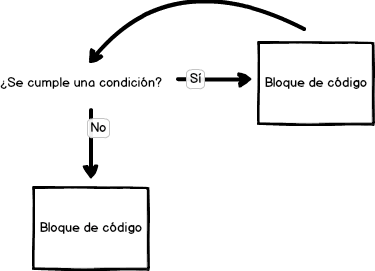

In [3]:
my_items = ['a', 'b', 'c']

i = 0
while i < len(my_items):
    print(my_items[i])
    i += 1

a
b
c


### Instrucción `for`

La instrucción `for` permite repetir un bloque de código un número determinado de veces.

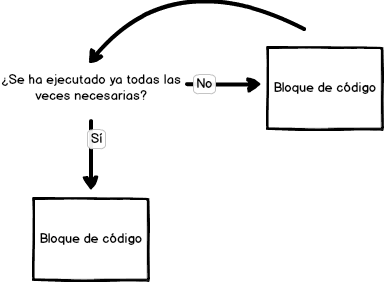

La instrucción para realizar bucles `for` es un poco diferente de otros lenguajes de programación.

En vez de iterar sobre una progresión aritmética de números, dando al usuario la posibilidad de establecer el incremento en cada iteración, el bucle `for` de Python **itera sobre los elementos de cualquier secuencia** (lista, cadena de texto, etc.) en el orden que estos elementos aparecen en la secuencia.

In [4]:
words = ['cat', 'window', 'defenestrate']
for word in words:
    print(word, len(word))

cat 3
window 6
defenestrate 12


In [5]:
word = 'pneumonoultramicroscopicsilicovolcanoconiosis'
for letter in word:
    print(letter)

p
n
e
u
m
o
n
o
u
l
t
r
a
m
i
c
r
o
s
c
o
p
i
c
s
i
l
i
c
o
v
o
l
c
a
n
o
c
o
n
i
o
s
i
s


#### Usa la  función `enumerate` en los bucles en vez de crear una variable de índice

**Dañino**

```python
my_container = ['Larry', 'Moe', 'Curly']
index = 0
for element in my_container:
    print ('{} {}'.format(index, element))
    index += 1
```

**Idiomático**

```python
my_container = ['Larry', 'Moe', 'Curly']
for index, element in enumerate(my_container):
    print ('{} {}'.format(index, element))
```

#### Instrucción `range`

La función `range()` permite generar secuencias de números. Se puede utilizar para iterar sobre los índices de una lista de la siguiente forma.

```python
range([start,] stop [, step])
```

- `start`: por dónde empieza la secuencia (opcional)
- `stop`: donde acaba la secuencia (no se incluye en el resultado)
- `step`: incremento de cada uno de los elementos de la secuencia


In [6]:
a = ['Mary', 'had', 'a', 'little', 'lamb']
for i in range(len(a)):
    print(i, a[i])

0 Mary
1 had
2 a
3 little
4 lamb


#### Usa una lista por compresión para crear una versión transformada de una lista existente


**Dañino**

```python
some_other_list = range(10)
some_list = list()
for element in some_other_list:
    if is_prime(element):
        some_list.append(element + 5)
```

**Idiomático**

```python
some_other_list = range(10)
some_list = [element + 5
             for element in some_other_list
             if is_prime(element)]
```

#### Instrucciones `break`, `continue` y `else` en los bucles

La instrucción `break`, como en otros lenguajes, rompe la ejecución de la iteración más interna, mientras que `continue` pasa a la siguiente iteración del bucle.

En un bucle se puede definir la instrucción `else`, que se ejecutará siempre que el bucle termine sin que se salga usando una instrucción `break`

In [12]:
elements = map(lambda x: x **2, range(10))
print(elements)
n = 5
for element in elements:
    if element > n:
        print(element)
        break
    print("Despues del if ")
else:
    print(f"No hay un número mayor que {n}")

Despues del continue
Despues del continue
Despues del continue
9


### Instrucción `pass`

La instrucción `pass` no hace nada, y se usa para cuando necesitamos que un programa sea sintácticamente correcto pero no requiere ninguna acción.

```python
while True:
    pass  # Espera infinita, hasta que se cancele la ejecución desde teclado (Ctrl + C)
```

### Iteradores

La mayoría de los contenedores y estructuras de datos que hemos visto hasta ahora pueden ser recorridas usando un bucle `for`.

```python
for element in [1, 2, 3]:
    print(element)
for element in (1, 2, 3):
    print(element)
for key in {'one':1, 'two':2}:
    print(key)
for char in "123":
    print(char)
for line in open("myfile.txt"):
    print(line, end='')
```

Cuando se ejecuta un bucle `for`, internamente se llama a la función `iter()` pasandole el contenedor. Esta función devuelve un objeto **iterador**.

#### Módulo `itertools`

El módulo de `itertools` implementa una serie de constructores para crear iteradores, inspirados en lenguajes funcionales. Estandariza una serie de herramientas rápidas y eficientes en memoria que son útiles por si mismas o combinadas.

##### Iteradores infinitos

Iterador | Argumentos | Resultado | Ejemplo
---------|------------|-----------|--------
count() | start, [step] | start, start+step, start+2\*step, … | count(10) --> 10 11 12 13 14 ...
cycle() | p | p0, p1, … plast, p0, p1, … | cycle('ABCD') --> A B C D A B C D ...
repeat() | elem [,n] | elem, elem, elem, … sin fin o hasta n veces | repeat(10, 3) --> 10 10 10


In [13]:
from itertools import count


for value in count(5, 3):
    print(value)
    if value == 20:
        break

5
8
11
14
17
20


In [1]:
from itertools import cycle


counter = 0 
for element in cycle("Python"):
    print(element)
    counter += 1
    if counter == 12: 
        break

P
y
t
h
o
n
P
y
t
h
o
n


In [1]:
from itertools import repeat


for element in repeat(3, 5):
    print(element)

##### Iteradores que terminan en la secuencia de entrada más corta

Iterador | Argumentos | Resultado | Ejemplo
---------|------------|-----------|--------
accumulate() | p [,func]|p0, p0+p1, p0+p1+p2, …|accumulate([1,2,3,4,5]) --> 1 3 6 10 15
chain() |p, q, …|p0, p1, … plast, q0, q1, … |chain('ABC', 'DEF') --> A B C D E F
chain.from_iterable() |iterable |p0, p1, … plast, q0, q1, … |chain.from_iterable(['ABC', 'DEF']) --> A B C D E F
compress() |data, selectors |(d[0] if s[0]), (d[1] if s[1]), … |compress('ABCDEF', [1,0,1,0,1,1]) --> A C E F
dropwhile() |pred, seq |seq[n], seq[n+1], emezando cuando pred falle |dropwhile(lambda x: x<5, [1,4,6,4,1]) --> 6 4 1
filterfalse() |pred, seq |elementos de seq donde pred(elem) es False | filterfalse(lambda x: x%2, range(10)) --> 0 2 4 6 8
groupby() |iterable[, key] |sub-iteradores agrupados por valor de key(v) |
islice() |seq, [start,] stop [, step] |elementos de seq[start:stop:step] |islice('ABCDEFG', 2, None) --> C D E F G
starmap() |func, seq |func(*seq[0]), func(*seq[1]), … |starmap(pow, [(2,5), (3,2), (10,3)]) --> 32 9 1000
takewhile() | pred, seq |seq[0], seq[1], hasta que pred falla |takewhile(lambda x: x<5, [1,4,6,4,1]) --> 1 4
tee() |it, n |it1, it2, … itn divide un iterador en n | 
zip_longest() |p, q, … |(p[0], q[0]), (p[1], q[1]), … |zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D-



##### Iteradores de combinatoria

Iterador | Argumentos | Resultado | Ejemplo
---------|------------|-----------|--------
product() |p, q, … [repeat=1] | producto cartesianso, equivalente a un bucle for anidado | product('ABCD', repeat=2) --> AA AB AC AD BA BB BC BD CA CB CC CD DA DB DC DD
permutations() |p[, r] |tuplas de longitud r, con todos los ordenes posibles, sin elementos repetidos | permutations('ABCD', 2) --> AB AC AD BA BC BD CA CB CD DA DB DC
combinations() |p, r | tuplas de longitud r, ordenadas, sin elementos repetidos | combinations('ABCD', 2) --> AB AC AD BC BD CD
combinations_with_replacement()|p, r|tuplas de longitud r, ordenadas, con elementos repetidos | combinations_with_replacement('ABCD', 2) --> AA AB AC AD BB BC BD CC CD DD
